# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Cleaning and wrangling
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5.Stationarizing the Data

# 1. Importing libraries and data

In [149]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [150]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [155]:
# import the cvs file
path = r'/Users/fatemehshahvirdi/Work-Related/Data Analysis/Data Immersion/Achievement 6/Rome & Sydney Analysis/O2 Data'
df_rome = pd.read_csv(os.path.join(path, 'Prepared', 'rome_listings_june_cleaned-3.csv'), index_col=False)

# 2. Cleaning and wrangling

In [157]:
# Remove the unwanted column
df_rome = df_rome.loc[:, ~df_rome.columns.str.contains('Unnamed: 0')]

In [158]:
df_rome.head()

,id,host_id,place_name,rating,num_bedroom,num_bed,baths,neighborhood,latitude,longitude,room_type,price,min_nights,num_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
0,2737,3047,Place to stay in Rome,4.80,1.0,1.0,1.5 baths,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28 00:00:00,0.07,6,358,0
1,181189,868477,Bed and breakfast in Rome,4.72,1.0,1.0,1 private bath,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05 00:00:00,1.03,8,175,6
2,11834,44552,Rental unit in Rome,4.80,1.0,1.0,1 bath,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02 00:00:00,1.30,1,246,44
3,49240,224479,Condo in Rome,4.69,2.0,5.0,1.5 baths,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11 00:00:00,0.46,2,151,32
4,181747,871063,Rental unit in Rome,4.56,2.0,3.0,2 baths,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09 00:00:00,0.63,2,329,42


In [160]:
df_rome = df_rome.dropna(subset=['last_review'])

In [161]:
df_rome.isnull().sum()

id                                0
host_id                           0
place_name                        0
rating                            0
num_bedroom                       0
num_bed                           0
baths                             0
neighborhood                      0
latitude                          0
longitude                         0
room_type                         0
price                             0
min_nights                        0
num_reviews                       0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
num_reviews_last_12m              0
dtype: int64

In [162]:
# agg sale data by day
df_rome_2 = df_rome.groupby('last_review').agg({'num_reviews':['sum']})

In [164]:
df_rome_2.columns

MultiIndex([('num_reviews', 'sum')],
           )

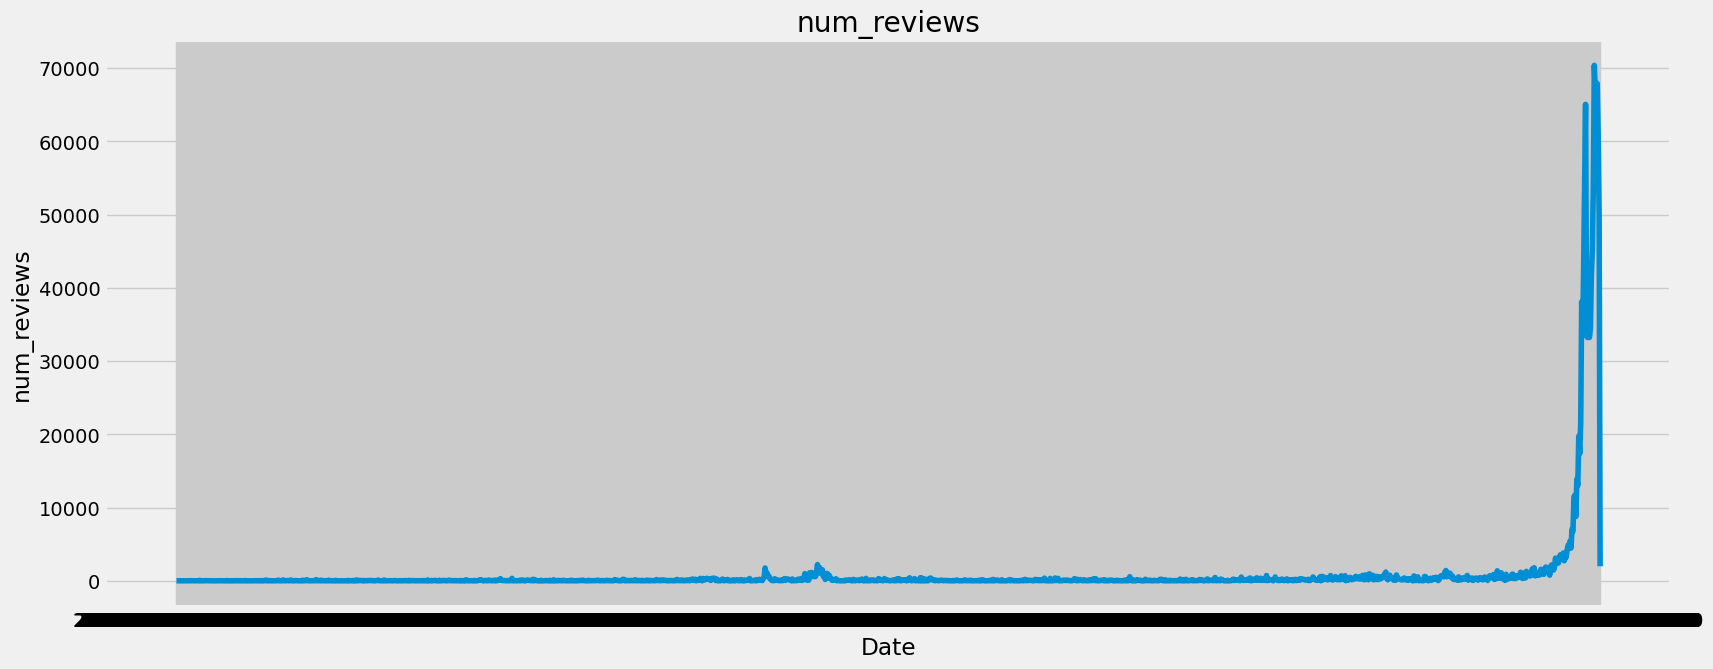

In [166]:
plt.figure(figsize=(18,7), dpi=100) 
plt.title('num_reviews')
plt.xlabel('Date')
plt.ylabel('num_reviews')
plt.plot(df_rome_2)

In [168]:
df_rome_2.head()

,num_reviews
,sum
last_review,
2012-06-03 00:00:00,7
2013-06-11 00:00:00,4
2014-06-10 00:00:00,4
2014-10-31 00:00:00,5
2014-12-17 00:00:00,5


# 3.Time series analysis: decomposition

In [170]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_rome_2, model='additive', period=4)

In [171]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

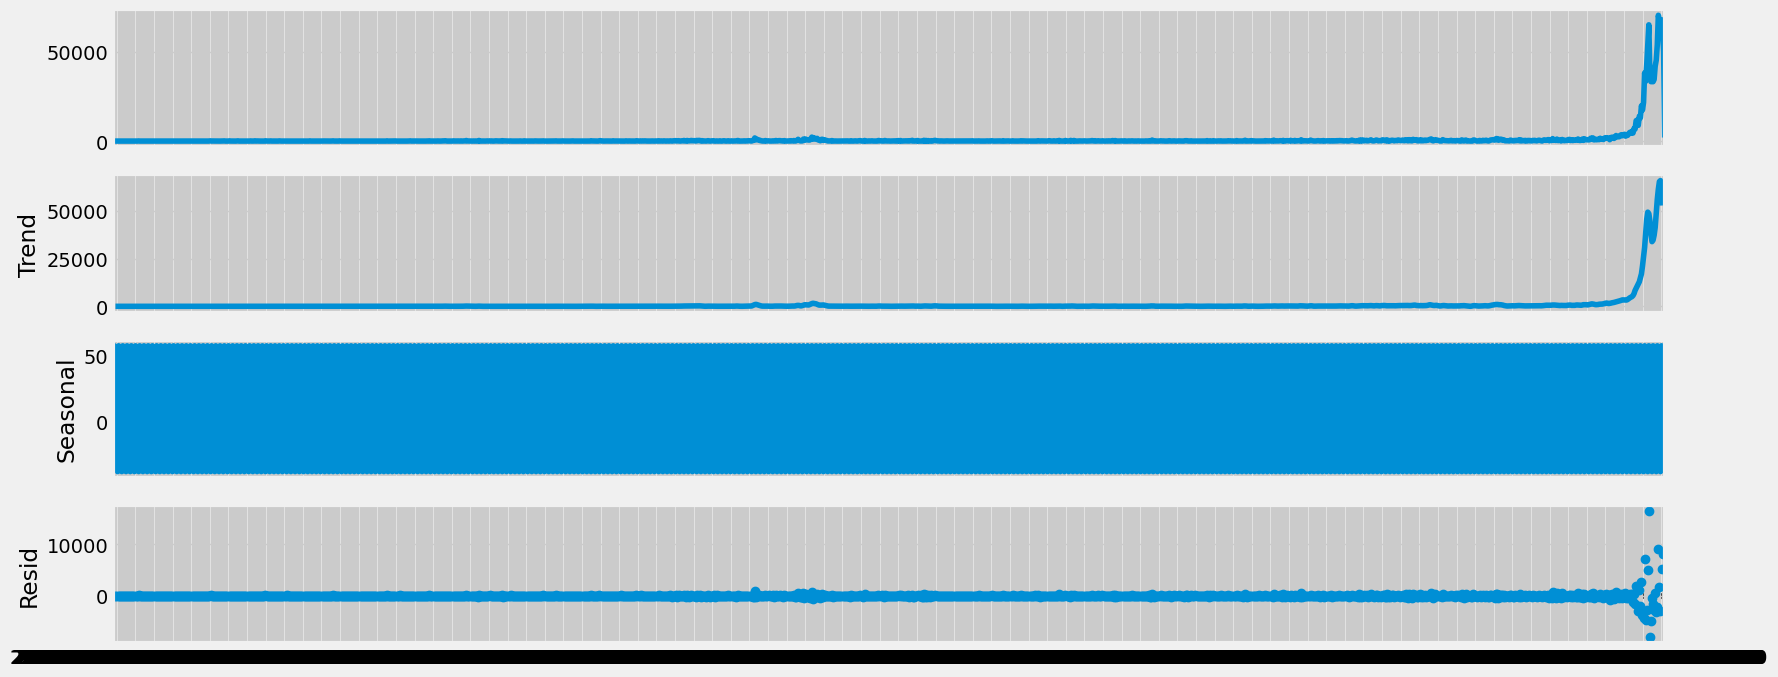

In [172]:
# Plot the separate components

decomposition.plot()
plt.show()

# 4. Testing for stationarity

In [176]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_rome_2['num_reviews'])

Dickey-Fuller Stationarity test:
Test Statistic                    7.882894
p-value                           1.000000
Number of Lags Used              24.000000
Number of Observations Used    1444.000000
Critical Value (1%)              -3.434887
Critical Value (5%)              -2.863544
Critical Value (10%)             -2.567837
dtype: float64


##### p-value > 0.05 and 
##### Test Statistic > critical values 
##### => data not stationary!

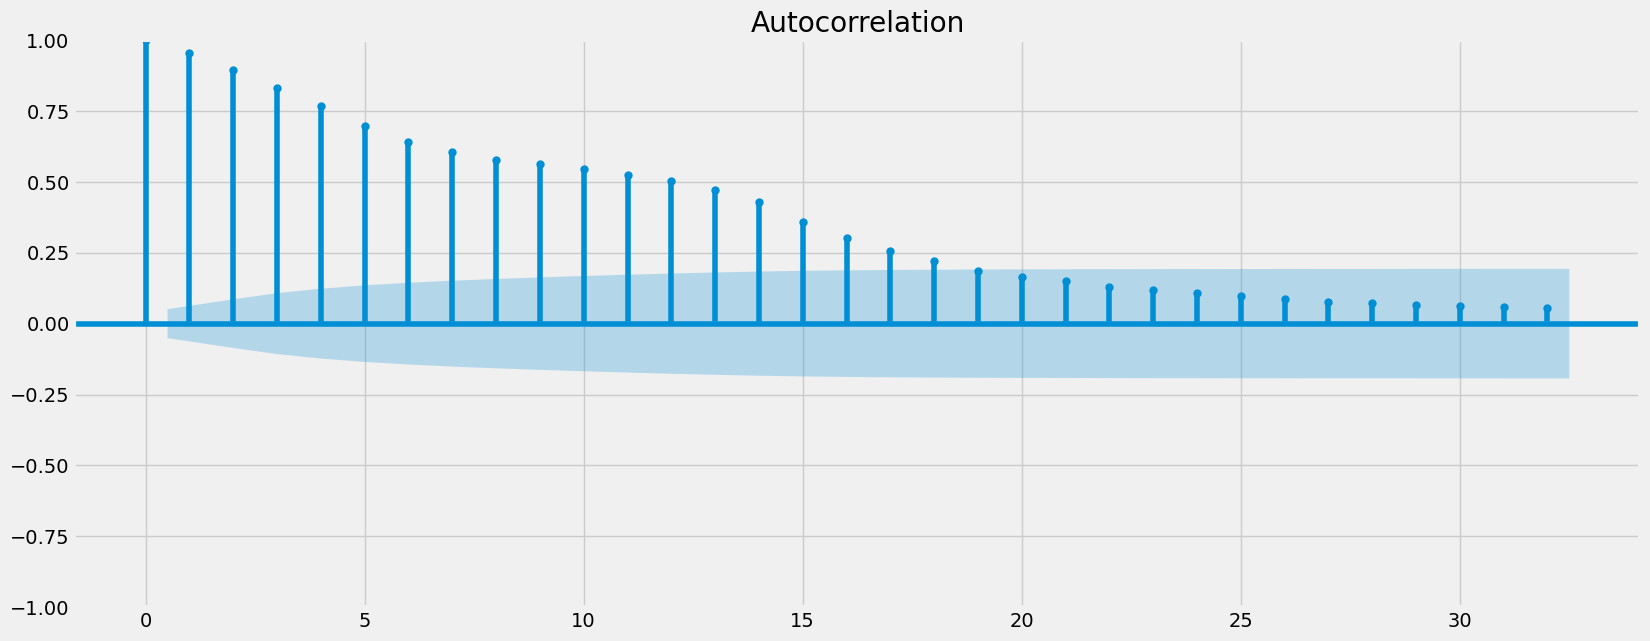

In [177]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_rome_2)
plt.show()

# 5.Stationarizing the Data

In [178]:
data_diff = df_rome_2 - df_rome_2.shift(1) 
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [179]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [180]:
data_diff.head()

,num_reviews
,sum
last_review,
2013-06-11 00:00:00,-3.0
2014-06-10 00:00:00,0.0
2014-10-31 00:00:00,1.0
2014-12-17 00:00:00,0.0
2014-12-27 00:00:00,1.0


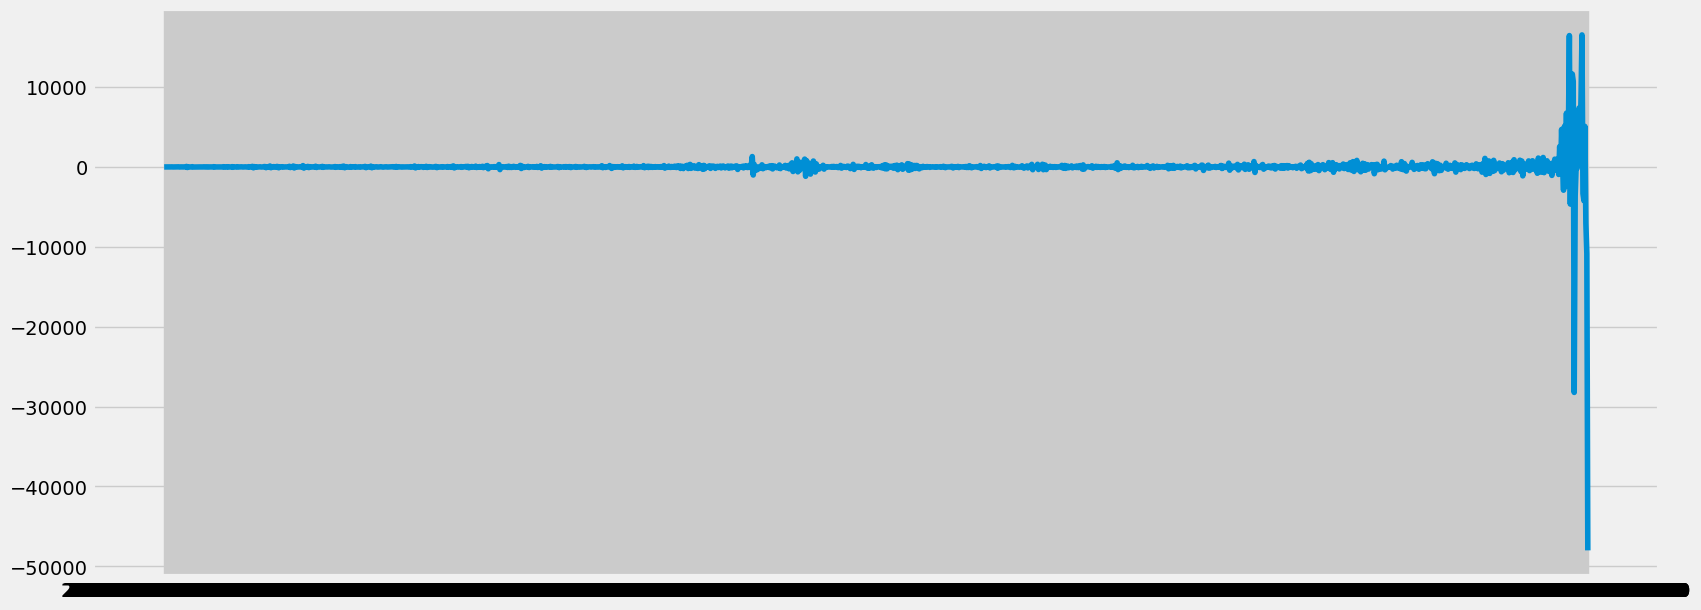

In [181]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(18,7), dpi=100)
plt.plot(data_diff)

In [182]:
# Re-run Dickey Fuller
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   -2.085344
p-value                           0.250449
Number of Lags Used              24.000000
Number of Observations Used    1443.000000
Critical Value (1%)              -3.434890
Critical Value (5%)              -2.863545
Critical Value (10%)             -2.567837
dtype: float64


##### p-value > 0.05 and 
##### Test Statistic > critical values 
##### => data not stationary!

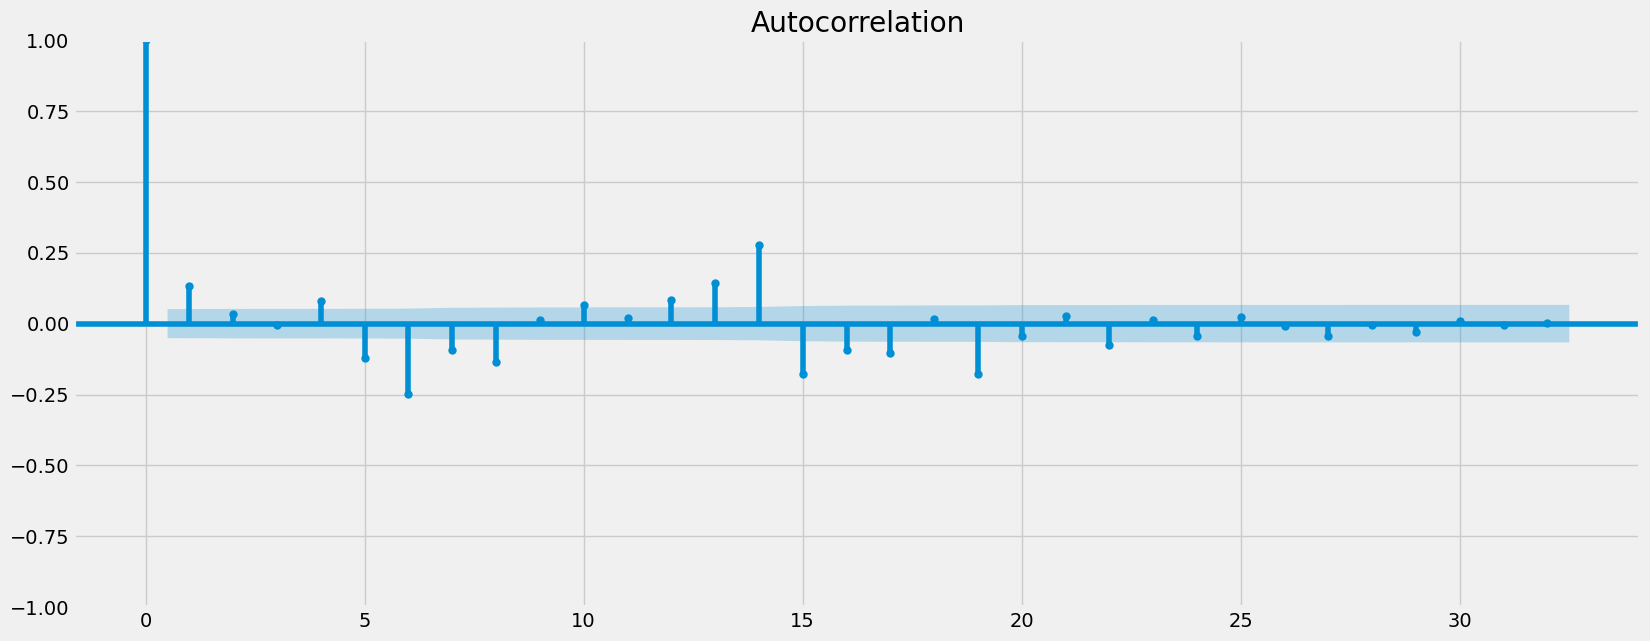

In [183]:
# Re-run auto correlation
plot_acf(data_diff)
plt.show()

# second round Differencing

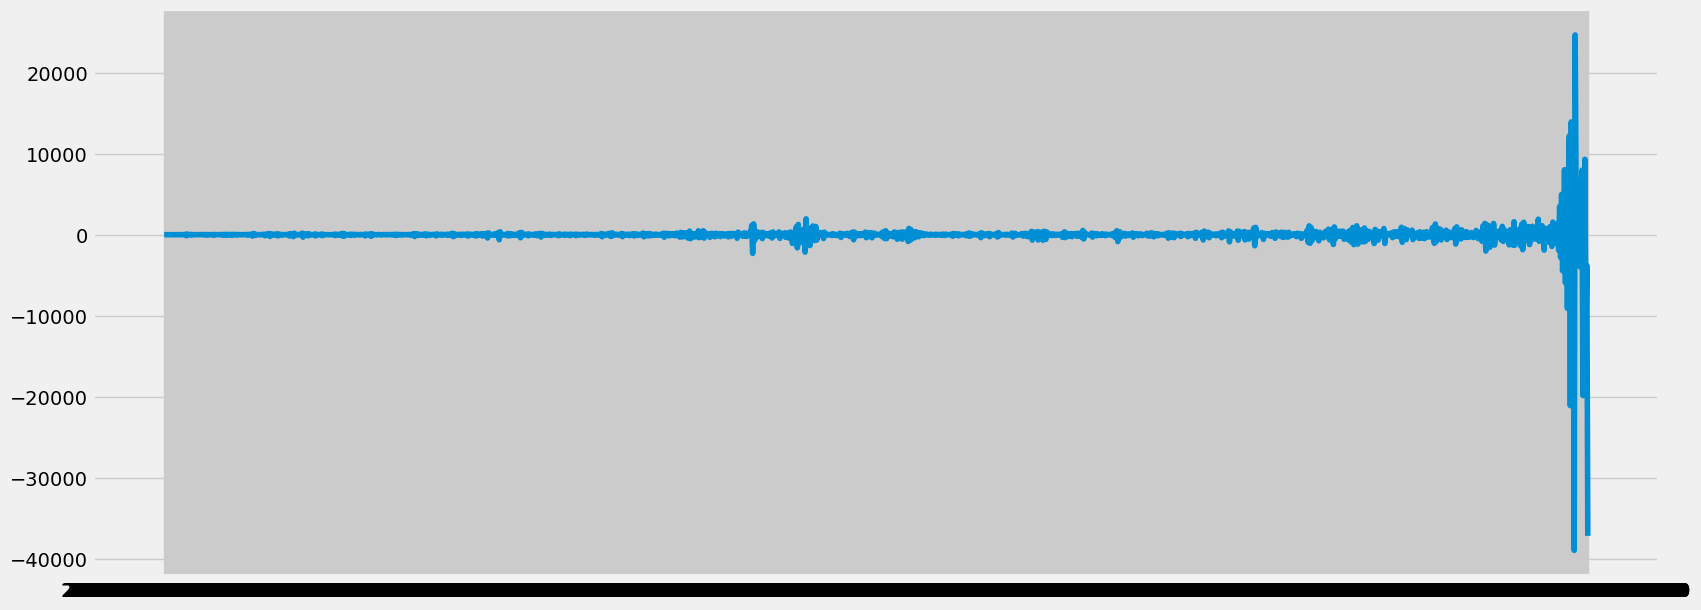

In [184]:
data_diff2 = data_diff - data_diff.shift(1) 
data_diff2.dropna(inplace = True)
plt.figure(figsize=(18,7), dpi=100)
plt.plot(data_diff2)

In [185]:
# Re-run Dickey Fuller
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.302828e+01
p-value                        2.374272e-24
Number of Lags Used            2.400000e+01
Number of Observations Used    1.442000e+03
Critical Value (1%)           -3.434893e+00
Critical Value (5%)           -2.863546e+00
Critical Value (10%)          -2.567838e+00
dtype: float64


##### p-value = 2.484999e-24= 0.000000000000000000000002484999 < 0.05 

##### and Test Statistic = -1.301823e+01 = −13.01823 < critical values

##### => data is stationary!

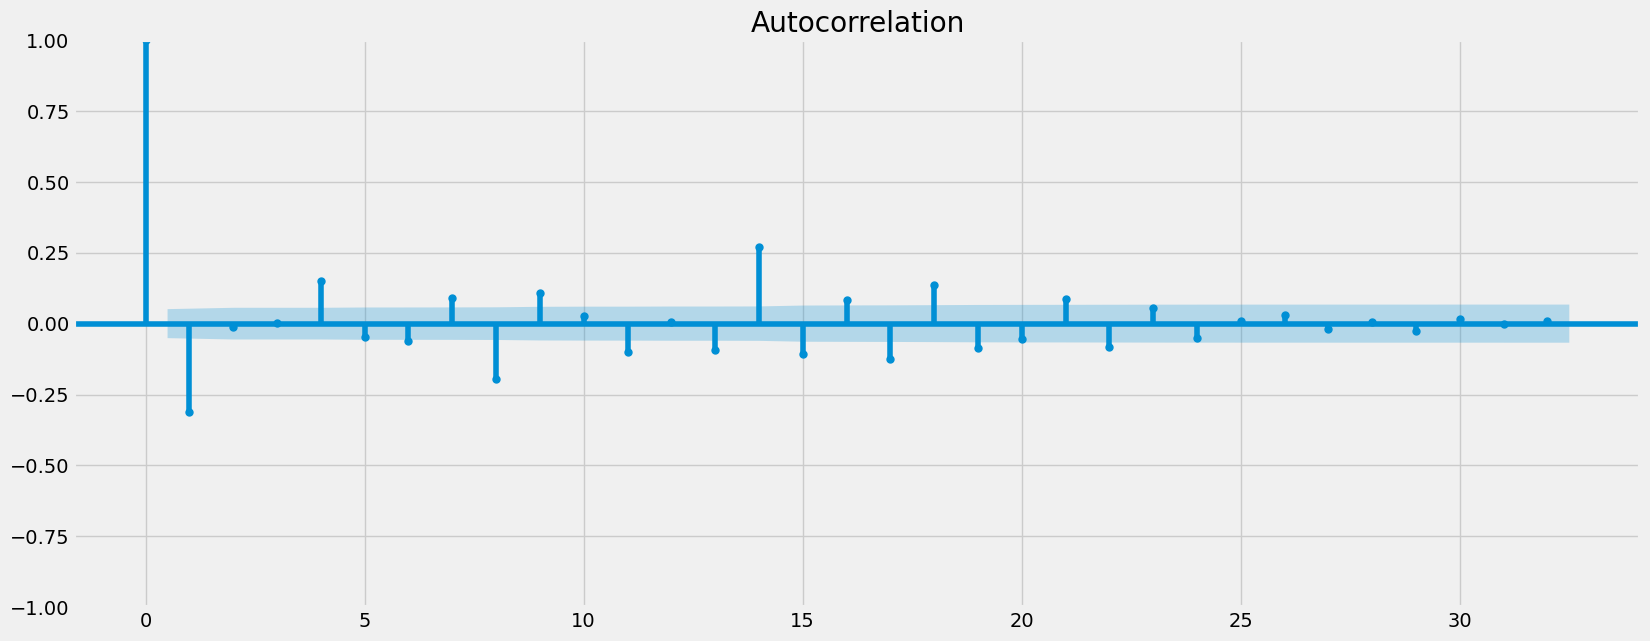

In [186]:
plot_acf(data_diff2)
plt.show()